In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

credit = pd.read_csv("credit.csv")

In [25]:
col_dicts = {}
cols = ['telephone', 'foreign_worker']
cols_encode = ['checking_balance', 'credit_history', 'employment_length', 'housing',
               'installment_plan', 'job', 'other_debtors', 'personal_status', 'property',
               'purpose', 'savings_balance', 'installment_rate', 'residence_history',
               'existing_credits']

col_dicts = {
    'foreign_worker': {'no': 1, 'yes': 0},
    'telephone': {'none': 1, 'yes': 0}}

for col in cols:
    credit[col] = credit[col].map(col_dicts[col])

credit = pd.get_dummies(credit, columns=cols_encode)

In [26]:
# 定义异常值阈值（例如，3倍标准差）
threshold = 3

# 获取数值型特征列
numeric_cols = credit.select_dtypes(include=[np.number])

# 计算每个数值型特征的Z-score
z_scores = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()

# 筛选出Z-score超过阈值的异常值所在的行索引
outlier_indices = np.where(np.abs(z_scores) > threshold)

# 删除异常值所在的行
credit_filtered = credit.drop(outlier_indices[0])

# 输出处理后的数据集
print(credit_filtered.head())

   months_loan_duration  amount  age  dependents  telephone  foreign_worker  \
0                     6    1169   67           1          0               0   
1                    48    5951   22           1          1               0   
2                    12    2096   49           2          1               0   
3                    42    7882   45           2          1               0   
4                    24    4870   53           2          1               0   

   default  checking_balance_1 - 200 DM  checking_balance_< 0 DM  \
0        1                        False                     True   
1        2                         True                    False   
2        1                        False                    False   
3        1                        False                     True   
4        2                        False                     True   

   checking_balance_> 200 DM  ...  installment_rate_3  installment_rate_4  \
0                      False  ...      

In [27]:
from sklearn.model_selection import train_test_split

y = credit['default']
del credit['default']
x = credit
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))
x_train

default
1    0.6975
2    0.3025
Name: count, dtype: float64
default
1    0.71
2    0.29
Name: count, dtype: float64


,months_loan_duration,amount,age,dependents,telephone,foreign_worker,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,installment_rate_3,installment_rate_4,residence_history_1,residence_history_2,residence_history_3,residence_history_4,existing_credits_1,existing_credits_2,existing_credits_3,existing_credits_4
687,36,2862,30,1,1,0,True,False,False,False,...,False,True,False,False,True,False,True,False,False,False
500,24,3123,27,1,1,0,False,True,False,False,...,False,True,True,False,False,False,True,False,False,False
332,60,7408,24,1,1,0,True,False,False,False,...,False,True,False,True,False,False,True,False,False,False
979,15,1264,25,1,1,0,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
817,6,1554,24,1,0,0,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,12,1082,48,1,1,0,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
192,27,3915,36,2,0,0,True,False,False,False,...,False,True,False,True,False,False,True,False,False,False
629,9,3832,64,1,1,0,False,False,False,True,...,False,False,False,False,False,True,True,False,False,False
559,18,1928,31,1,1,0,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False


决策树

              precision    recall  f1-score   support

           1       0.81      0.87      0.84       142
           2       0.61      0.52      0.56        58

    accuracy                           0.77       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200

[[123  19]
 [ 28  30]]
0.765


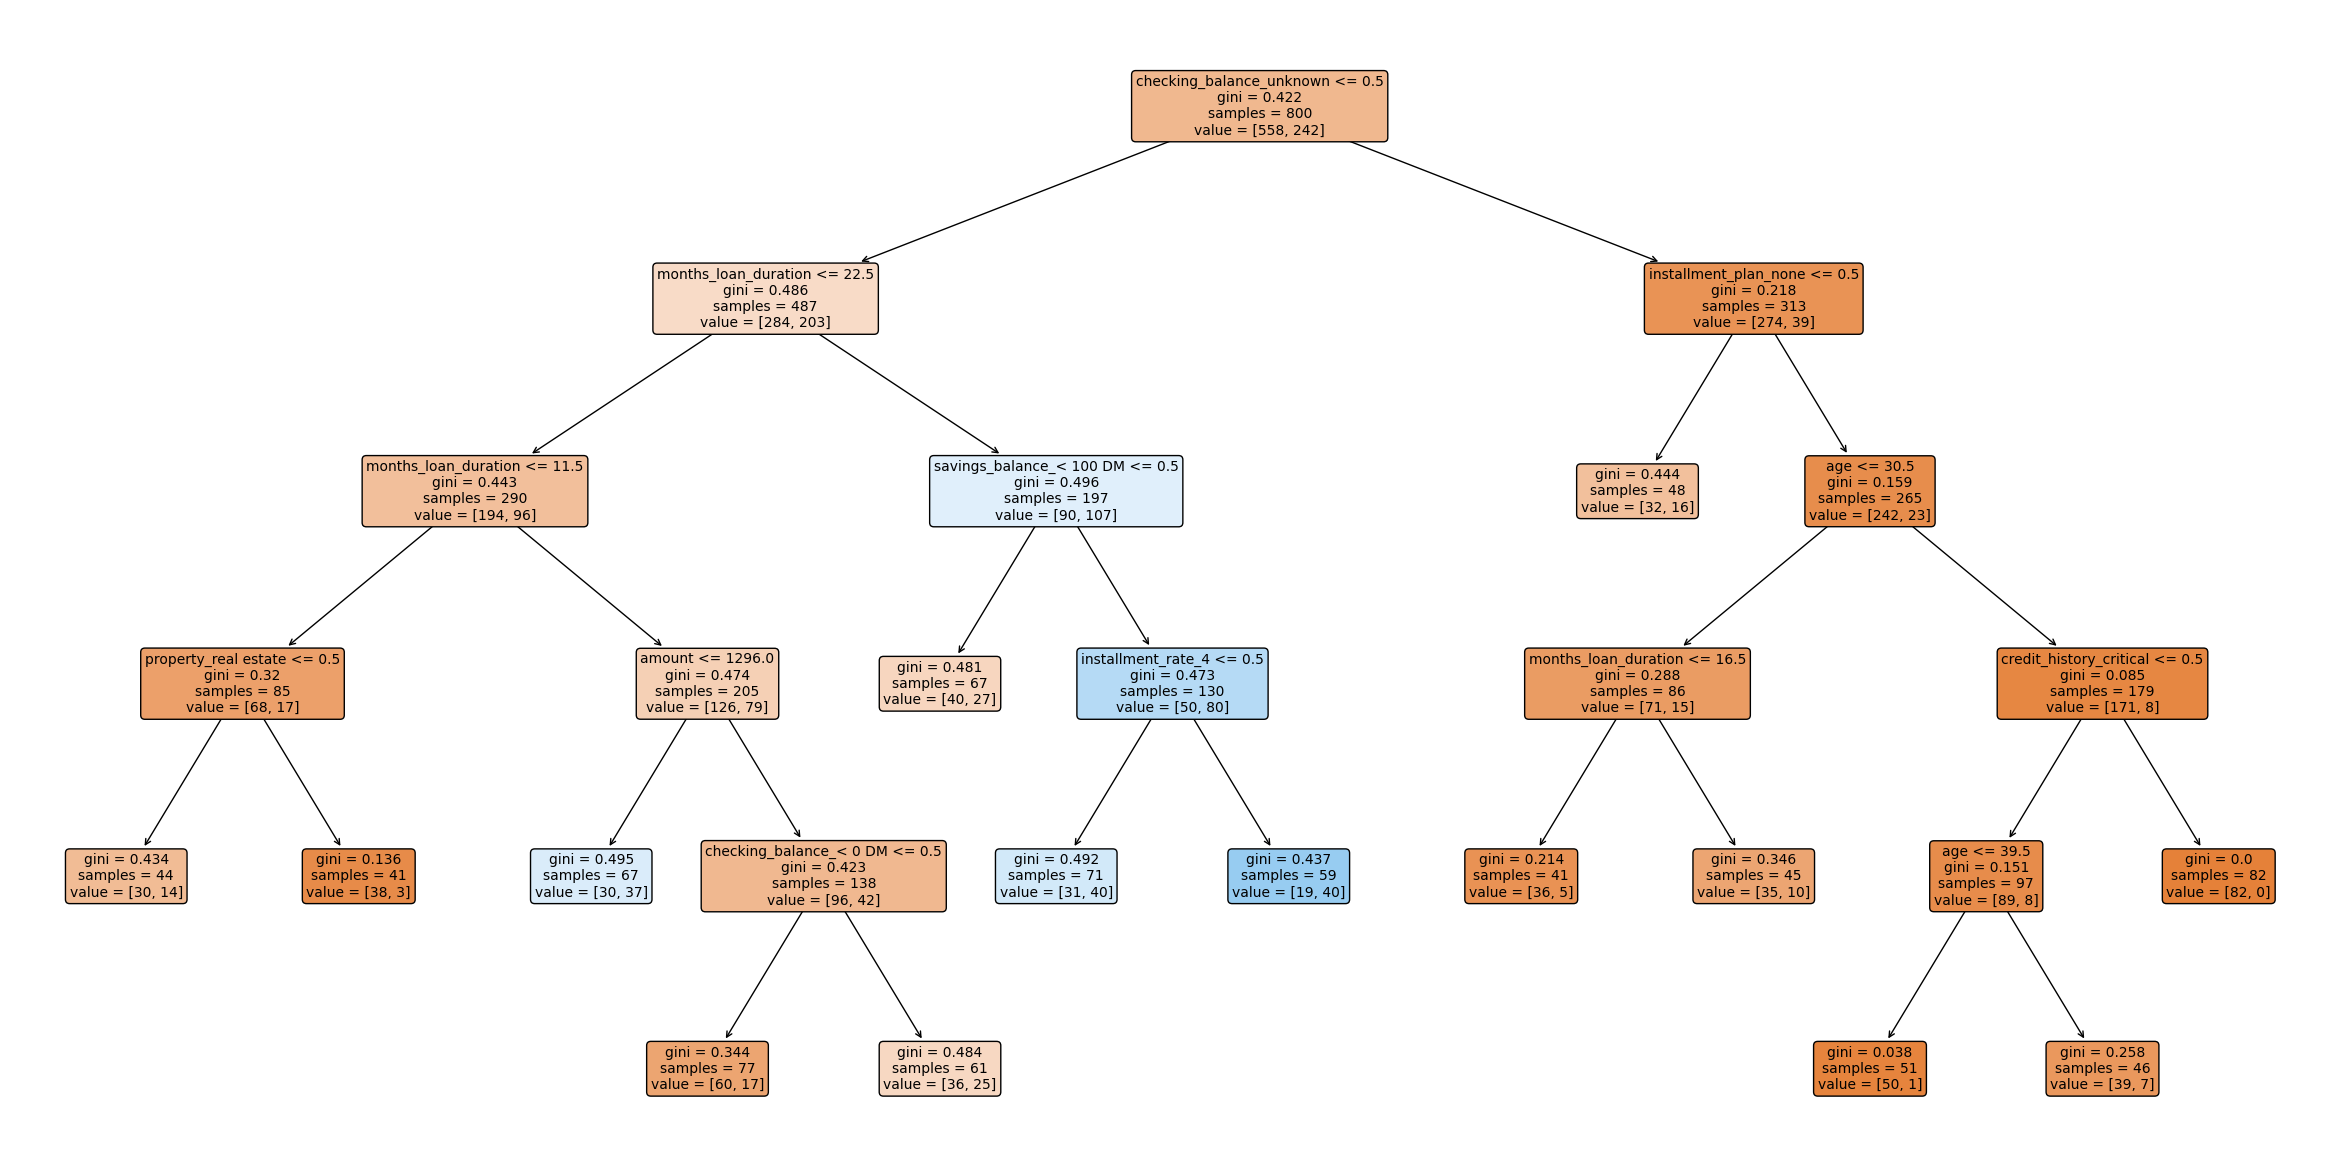

In [28]:
# 模型训练
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
credit_model = DecisionTreeClassifier(min_samples_leaf=40)
credit_model.fit(x_train, y_train)

# 模型性能评估
credit_pred = credit_model.predict(x_test)
print(metrics.classification_report(y_test, credit_pred))
print(metrics.confusion_matrix(y_test, credit_pred))
print(metrics.accuracy_score(y_test, credit_pred))

# 模型可视化
plt.figure(figsize=(30, 15))
tree.plot_tree(credit_model, feature_names=x_train.columns.tolist(),
               filled=True, rounded=True, fontsize=10)
plt.show()

knn

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 创建标准化对象
scaler = StandardScaler()

# 对训练集进行标准化
x_train_scaled = scaler.fit_transform(x_train)

# 对测试集进行标准化
x_test_scaled = scaler.transform(x_test)

# 创建k近邻分类器
knn_model = KNeighborsClassifier(n_neighbors=4)

# 训练模型
knn_model.fit(x_train_scaled, y_train)

# 预测测试集
y_pred = knn_model.predict(x_test_scaled)

# 模型性能评估
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.93      0.84       142
           2       0.63      0.29      0.40        58

    accuracy                           0.74       200
   macro avg       0.70      0.61      0.62       200
weighted avg       0.72      0.74      0.71       200

[[132  10]
 [ 41  17]]
0.745


svm

In [30]:
from sklearn import svm

# 创建SVM分类器
svm_classifier = svm.SVC(kernel='linear',probability=True)

# 训练模型
svm_classifier.fit(x_train, y_train)

# 预测测试集
y_pred = svm_classifier.predict(x_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.86      0.84       142
           2       0.62      0.55      0.58        58

    accuracy                           0.77       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.76      0.77      0.77       200

[[122  20]
 [ 26  32]]
0.77


贝叶斯

In [31]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(x_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.73      0.78       142
           2       0.49      0.62      0.55        58

    accuracy                           0.70       200
   macro avg       0.66      0.68      0.66       200
weighted avg       0.73      0.70      0.71       200

[[104  38]
 [ 22  36]]
0.7


adaboost

In [32]:
from sklearn.ensemble import AdaBoostClassifier
# Create a base classifier (you can choose another classifier if you want)
base_classifier = DecisionTreeClassifier(min_samples_leaf=6)

# Create AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    base_classifier, n_estimators=150, random_state=42)

# Fit the model on the training data
adaboost_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(x_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.89      0.84       142
           2       0.62      0.43      0.51        58

    accuracy                           0.76       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.74      0.76      0.75       200

[[127  15]
 [ 33  25]]
0.76


随机森林

In [33]:
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器
rf_classifier = RandomForestClassifier()

# 训练模型
rf_classifier.fit(x_train, y_train)

# 预测测试集
y_pred = rf_classifier.predict(x_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.89      0.84       142
           2       0.62      0.43      0.51        58

    accuracy                           0.76       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.74      0.76      0.75       200

[[127  15]
 [ 33  25]]
0.76
